In [1]:
# Import libraries/modules
from qiskit import *
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit_textbook.problems import grover_problem_oracle
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random as rm

In [2]:
# Connect to IBMQ API
IBMQ.save_account('API-KEY', overwrite=True)

In [3]:
# Access account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
def run_local_sim(circuit):
    """
    Run simulation on local device
    ...
    
    Parameters
    ----------
    circuit : TYPE: Object
        DESCRIPTION - Instance of quantum circuit
    Returns
    -------
    TYPE: Object
        DESCRIPTION - Instance matplotlib histogram
    """
    # Simulate circuit on local device
    simulator = Aer.get_backend('qasm_simulator')
    # Execute circuit and get result
    result = execute(circuit, backend = simulator).result()
    # Plot outcomes
    return plot_histogram(result.get_counts(circuit))

In [5]:
def run_quantum_comp_sim(circuit):
    """
    Connect to and run computation on a real quantum computer
    ...
    
    Parameters
    ----------
    circuit : TYPE: Object
        DESCRIPTION - Instance of quantum circuit
    Returns
    -------
    TYPE: Object
        DESCRIPTION - Instance matplotlib histogram
    """
    # Simulate on IBM quantum computer
    # Choose provider to run simulation
    provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    # Quantum computer to be used
    qcomp = provider.get_backend('ibmq_quito')
    # Create job
    job = execute(circuit, backend=qcomp)
    # Monitor job status in queue
    job_monitor(job)
    # Once job has run, get results
    result = job.result()
    # Plot results
    return plot_histogram(result.get_counts(circuit))

# Quantum Circuit 1:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> ----------------------- |M|<br>
|0> ----------|H|--------- |M|<br>
|0> ----------------------- |M|<br>

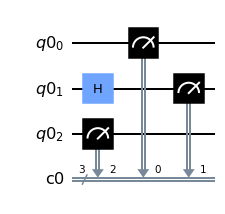

In [6]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr1 = QuantumRegister(n_qubits)
# n classical bit classical register
cr1 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_1 = QuantumCircuit(qr1, cr1)
# Apply Hadamard gate to qubit 1
circuit_1.h([qr1[1]])
# Take measurement and store in classical bits
circuit_1.measure(qr1, cr1)
# Draw circuit using matplotlib 
circuit_1.draw(output='mpl')

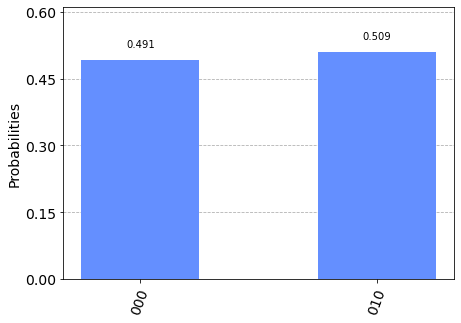

In [7]:
# Simulate circuit on local device
run_local_sim(circuit_1)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_1)

# Quantum Circuit 2:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> --|H|------------------ |M|<br>
|0> ----------|H|---------- |M|<br>
|0> ------------------|H|-- |M|<br>

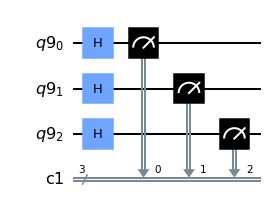

In [8]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr2 = QuantumRegister(n_qubits)
# n classical bit classical register
cr2 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_2 = QuantumCircuit(qr2, cr2)
# Apply Hadamard gate to qubits 0, 1, and 2
circuit_2.h([qr2[0],qr2[1],qr2[2]])
# Take measurement and store in classical bits
circuit_2.measure(qr2, cr2)
# Draw circuit using matplotlib 
circuit_2.draw(output='mpl')

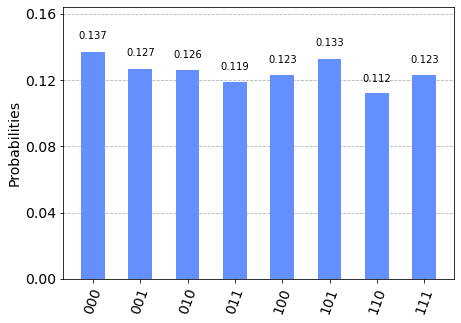

In [9]:
# Simulate circuit on local device
run_local_sim(circuit_2)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_2)

# Quantum Circuit 3:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> ----------------------- |M|<br>
|0> ----------------------- |M|<br>
|0> ---|H|----------|H|--- |M|<br>

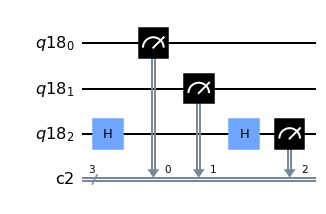

In [10]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr3 = QuantumRegister(n_qubits)
# n classical bit classical register
cr3 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_3 = QuantumCircuit(qr3, cr3)
# Apply 2 Hadamard gates to qubit 2
circuit_3.h([qr3[2],qr3[2]])
# Take measurement and store in classical bits
circuit_3.measure(qr3, cr3)
# Draw circuit using matplotlib 
circuit_3.draw(output='mpl')

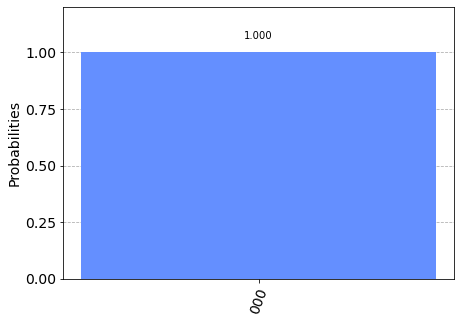

In [11]:
# Simulate circuit on local device
run_local_sim(circuit_3)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_3)

# Quantum Circuit 4:
|H| - Hadamard Gate<br>
|π| - Phase Shift Gate<br>
|M| - Measurement<br>
<br>
|0> ----------------------- |M|<br>
|0> ----------------------- |M|<br>
|0> ---|H|---|π|---|H|--- |M|<br>

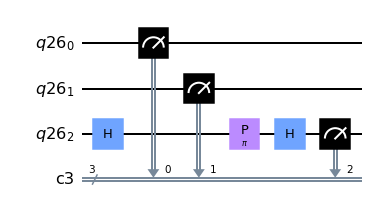

In [12]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr4 = QuantumRegister(n_qubits)
# n classical bit classical register
cr4 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_4 = QuantumCircuit(qr4, cr4)
# Apply a Hadamard gate, a phase shift gate, and another hadamard gate to qubit 2 
circuit_4.h([qr4[2]])
circuit_4.p(np.pi,[qr4[2]])
circuit_4.h([qr4[2]])
# Take measurement and store in classical bits
circuit_4.measure(qr4, cr4)
# Draw circuit using matplotlib 
circuit_4.draw(output='mpl')

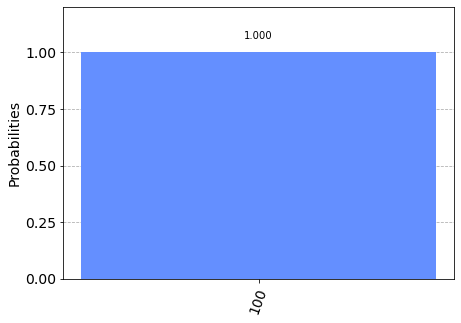

In [13]:
# Simulate circuit on local device
run_local_sim(circuit_4)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_4)

# Quantum Circuit 5:
|H| - Hadamard Gate<br>
|U c| - CNOT Gate - c: Control<br>
|U t| - CNOT Gate - t: Target<br>
|M| - Measurement<br>
<br>
|0> --------------------------- |M|<br>
|0> ---|H|-------|U c|------- |M|<br>
|0> --------------|U t|------- |M|<br>

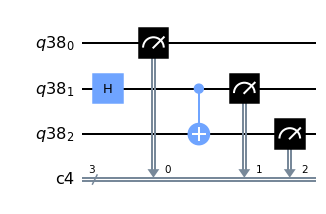

In [14]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr5 = QuantumRegister(n_qubits)
# n classical bit classical register
cr5 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_5 = QuantumCircuit(qr5, cr5)
# Apply a Hadamard gate and a CNOT gate to qubit 2
circuit_5.h([qr5[1]])
circuit_5.cx(qr5[1],qr5[2])
# Take measurement and store in classical bits
circuit_5.measure(qr5, cr5)
# Draw circuit using matplotlib 
circuit_5.draw(output='mpl')

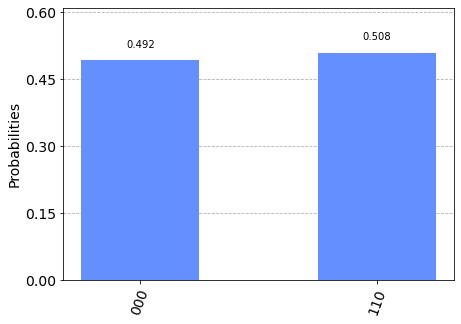

In [15]:
# Simulate circuit on local device
run_local_sim(circuit_5)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_5)

# Quantum Circuit 6:
|H| - Hadamard Gate<br>
|U c| - CNOT Gate - c: Control<br>
|U t| - CNOT Gate - t: Target<br>
|M| - Measurement<br>
<br>
|0> -------------------------|U t|--- |M|<br>
|0> ---|H|-------|U c|-----|U c|--- |M|<br>
|0> --------------|U t|-------------- |M|<br>

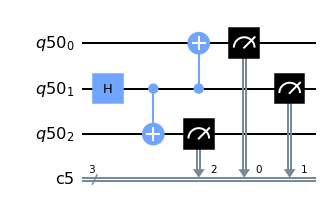

In [16]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr6 = QuantumRegister(n_qubits)
# n classical bit classical register
cr6 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_6 = QuantumCircuit(qr6, cr6)
# Apply a Hadamard gate and 2 CNOT gates to qubit 2
circuit_6.h([qr6[1]])
circuit_6.cx(qr6[1],qr6[2])
circuit_6.cx(qr6[1],qr6[0])
# Take measurement and store in classical bits
circuit_6.measure(qr6, cr6)
# Draw circuit using matplotlib 
circuit_6.draw(output='mpl')

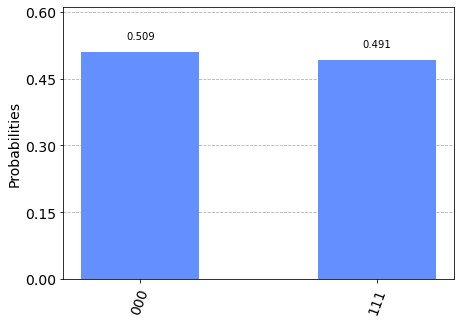

In [17]:
# Simulate circuit on local device
run_local_sim(circuit_6)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_6)

# Quantum Circuit 7:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> -------------------------- |M|<br>
|0> ----|H|-------|H|-------- |M|<br>
|0> -------------------------- |M|<br>

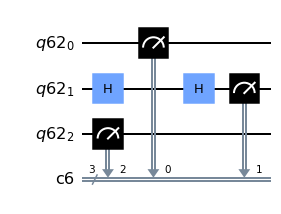

In [18]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr7 = QuantumRegister(n_qubits)
# n classical bit classical register
cr7 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_7 = QuantumCircuit(qr7, cr7)
# Apply a 2 Hadamard gates to qubit 2 
circuit_7.h([qr7[1]])
circuit_7.h([qr7[1]])
# Take measurement and store in classical bits
circuit_7.measure(qr7, cr7)
# Draw circuit using matplotlib 
circuit_7.draw(output='mpl')

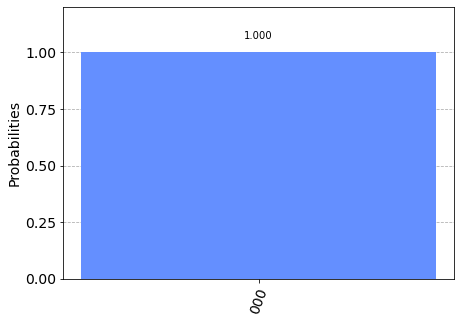

In [19]:
# Simulate circuit on local device
run_local_sim(circuit_7)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_7)

# Quantum Circuit 8:
|H| - Hadamard Gate<br>
|U c| - CNOT Gate - c: Control<br>
|U t| - CNOT Gate - t: Target<br>
|M| - Measurement<br>
<br>
|0> ---------------------------- |M|<br>
|0> ---|H|----|U c|----|H|--- |M|<br>
|0> -----------|U t|----------- |M|<br>

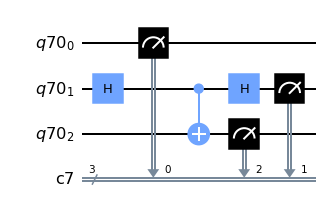

In [20]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr8 = QuantumRegister(n_qubits)
# n classical bit classical register
cr8 = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_8 = QuantumCircuit(qr8, cr8)
# Apply a Hadamard gate, a CNOT gate and another hadamard gate to qubit 2 
circuit_8.h([qr8[1]])
circuit_8.cx(qr8[1],qr8[2])
circuit_8.h([qr8[1]])
# Take measurement and store in classical bits
circuit_8.measure(qr8, cr8)
# Draw circuit using matplotlib 
circuit_8.draw(output='mpl')

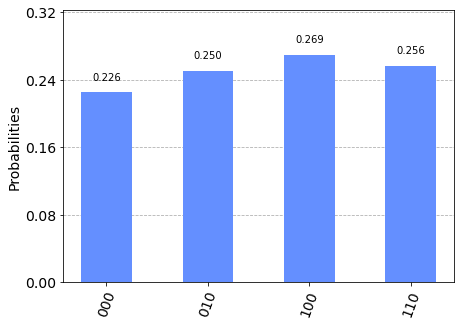

In [21]:
# Simulate circuit on local device
run_local_sim(circuit_8)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_8)

# Grovers Algorithm
|H| - Hadamard Gate<br>
|O| - Oracle<br>
|J| - J Operator<br>
|H|-|J|-|H| - Grover Diffusion Operator<br>
|M| - Measurement<br>
<br>
|0> -----|H|-----|O|-----|H|-|J|-|H|----- |M|<br>
|0> -----|H|-----|O|-----|H|-|J|-|H|----- |M|<br>
|0> -----|H|-----|O|-----|H|-|J|-|H|----- |M|<br>

In [22]:
# Amplification Function
def amplification(n_qubits):
    # Source: https://qiskit.org/textbook/ch-algorithms/grover.html#3qubits
    # Create instance of QuantumCircuit
    qc = QuantumCircuit(n_qubits)
    # Apply hadamard and a NOT gate to all qubits
    [qc.h(qubit) for qubit in range(n_qubits)]
    [qc.x(qubit) for qubit in range(n_qubits)]
    
    # Control-Control-Z Gate
    # Apply Hadamard gate to the last qubit
    qc.h(n_qubits-1)
    # Create multi-control gate - Last qubit as target, all other qubits as controls
    qc.mct(list(range(0,n_qubits-1)), n_qubits-1)
    # Apply Hadamard gate to the last qubit
    qc.h(n_qubits-1)
    
    # Apply a NOT and Hadamard gate to all qubits
    [qc.x(qubit) for qubit in range(n_qubits)]
    [qc.h(qubit) for qubit in range(n_qubits)]
    
    # Convert circuit to gate
    amp = qc.to_gate()
    # Name gate
    amp.name = "$Amplification$"
    return amp

Solutions:
|010>


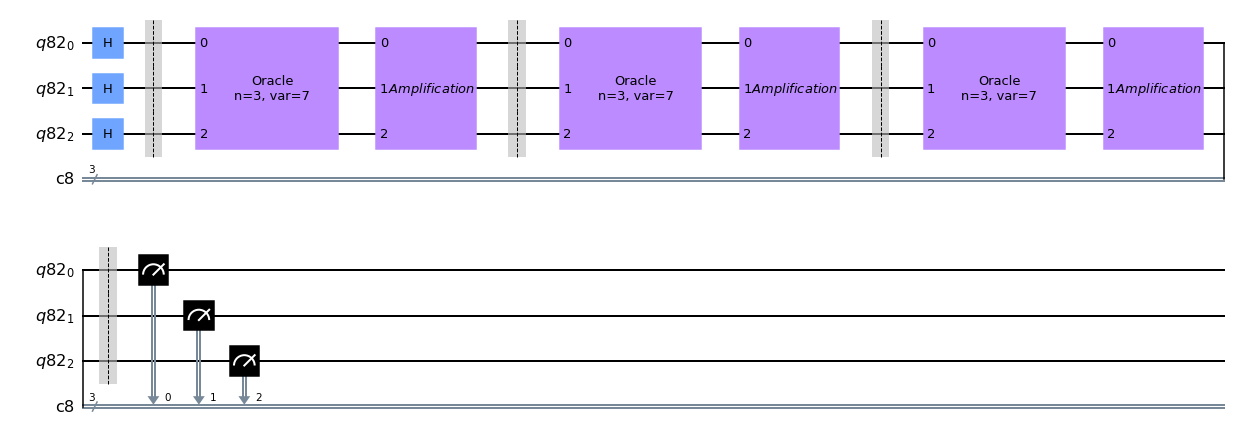

In [23]:
# Number of qubits in circuit
n_qubits = 3
# Number of classical bits in cirvuit
n_bits = 3
# n qubit quantum register
qr_grover = QuantumRegister(n_qubits)
# n classical bit classical register
cr_grover = ClassicalRegister(n_bits)
# Build quantum circuit using qr and cr
circuit_grover = QuantumCircuit(qr_grover, cr_grover)

# Calculate the number of iterations to run the algorithm
iterations = int(np.ceil(np.pi/4 * np.sqrt(2**n_qubits)))

# Grovers Algorithm:
circuit_grover.h([qubit for qubit in range(n_qubits)])

# Place barrier on diagram
circuit_grover.barrier()

# Create oracle
oracle = grover_problem_oracle(n_qubits, variant=7, print_solutions=True)
# Variant values
# 6 = 000
# 8 = 001
# 7 = 010
# 4 = 011
# 1 = 100
# 0 = 101
# 3 = 110
# 2 = 111
# Construct amplification gate
amp = amplification(n_qubits)

for i in range(iterations):
    # Apply oracle gate to qubits 0, 1, and 2
    circuit_grover.append(oracle, [0,1,2])
    # Apply amplification gate to qubits 0, 1, and 2
    circuit_grover.append(amp, [0,1,2])
    # Place barrier on diagram
    circuit_grover.barrier()

# Take measurement and store in classical bits
circuit_grover.measure(qr_grover, cr_grover)
# Draw circuit using matplotlib 
circuit_grover.draw(output='mpl')

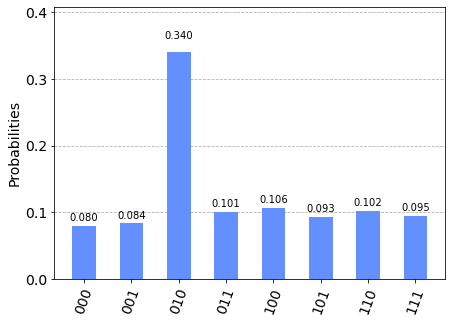

In [24]:
# Simulate circuit on local device
run_local_sim(circuit_grover)

In [ ]:
# Simulate on IBM quantum computer
run_quantum_comp_sim(circuit_grover)

# Shor's Algorithm
|H| - Hadamard Gate<br>
|M| - Measurement<br>
| . | - Control<br>
|f(x)| - a^n (mod C) gate<br>
|π/n| - Phase shift gate<br>
x-register = l2, l1, l0<br>
f-register = m3, m2, m1, m0<br>
<br>
IQFT:
<br>
l2 |0> ---|H|-----| . |-------| . |------------------------------------ |M|<br>
l1 |0> -----------|π/2|-------|---------|H|------| . |--------------- |M|<br>
l0 |0> ----------------------|π/4|---------------|π/2|------|H|---- |M|<br>
<br>
Full circuit:
<br>
l2 |0> -|H|-------------------------| . |----------|H|----| . |------| . |---------------------------------- |M|<br>
l1 |0> -|H|--------------| . |---------|-------------------|π/2|------|---------|H|---| . |--------------- |M|<br>
l0 |0> -|H|-----| . |-------|----------|-----------------------------|π/4|------------|π/2|------|H|---- |M|<br>
m3 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>
m2 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>
m1 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>
m0 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>

In [25]:
# Source: https://qiskit.org/documentation/tutorials/algorithms/08_factorizers.html
# Composite numbers
Cs = [15,21,33,35,39,45]

# Get simulator backend
backend = Aer.get_backend('aer_simulator')

# Define simulation quantum instances
quantum_instance = QuantumInstance(backend)

# Run Shor's algorithm on a simulation
shor = Shor(quantum_instance=quantum_instance)

for C in Cs:
    # Get results and print to console
    result = shor.factor(C)
    print('Factors of ' + str(C) + ': ' + str(result.factors))

Factors of 15: [[3, 5]]
Factors of 21: [[3, 7]]
Factors of 33: []
Factors of 35: [[5, 7]]
Factors of 39: [[3, 13]]
Factors of 45: [[5, 9], [3, 5]]


# Mermin's Quantum Device
|H| - Hadamard Gate<br>
| . | - Control<br>
|U| - CNOT Gate<br>
|R| - Rotation Gate<br>
|M| - Measurement<br>
<br>
|0> ---|H|---| . |------|R_A|---- |M|<br>
|0> ----------|U|------|R_B|---- |M|<br>

In [26]:
# Number of qubits in circuit
n_qubits = 2
# Number of classical bits in cirvuit
n_bits = 2
# n qubit quantum register
qr_mermin = QuantumRegister(n_qubits)
# n classical bit classical register
cr_mermin = ClassicalRegister(n_bits)

# Initialise list to store the 3 possible switch values
switches = [1,2,3]
# Initialise a list of the 3 possible angles in radians
angles = np.deg2rad([0,120,-120])

In [27]:
# Initialise list to store the 3 possible switch values
switches = [1,2,3]
# Initialise a list of the 3 possible angles in radians
angles = np.deg2rad([0,120,-120])
# Initialise counts as an empty dictionary
counts = dict()

# Run n iterations
for i in range(10000):
    
    # Build quantum circuit using qr and cr
    circuit_mermin = QuantumCircuit(qr_mermin, cr_mermin)

    # Apply a Hadamard gate to qubit 0, and a CNOT gate with control 0, target 1
    circuit_mermin.h(0)
    circuit_mermin.cx(0,1)
    
    # Randomly select switches for recievers A and B
    switch_A = rm.choice(switches)
    switch_B = rm.choice(switches)
    # Select corresponding angle
    theta_A = angles[switch_A-1]
    theta_B = angles[switch_B-1]
    
    # Apply rotation gate to qubit 0 and 1 with specified angle
    circuit_mermin.ry(theta_A, 0)
    circuit_mermin.ry(theta_B, 1)
    
    # Take measurement and store in classical bits
    circuit_mermin.measure(qr_mermin, cr_mermin)
    
    # Simulate circuit on local device
    simulator = Aer.get_backend('qasm_simulator')
    # Execute circuit and get result
    result = execute(circuit_mermin, backend = simulator).result()
    # Plot outcomes
    measurements = result.get_counts(circuit_mermin)
    
    # Iterate through each key in the measurements dictionary
    for m in measurements.keys():
        # Set key to equal m
        key = m
        # Remove all non-numerical values
        key = key.replace('|', '').replace('>', '')
        # Replace 0 with R
        key = key.replace('0', 'R')
        # Replace 1 with G
        key = key.replace('1', 'G')
        # Format key as as string containing switch A, switch B, colour A, colour B 
        key = str(switch_A) + str(switch_B) + key
        # Check if key is in count dictionary
        try:
            counts[key]
        # If not, initialise counts[key] to 0
        except:
            counts[key] = 0
        # Increment counts[key] by measurement[m]
        finally:
            counts[key] += measurements[m]

In [28]:
# Store counts on results
results = counts

# Initialise dictionaries to store outcome counts
one_1_counts = dict()
one_2_counts = dict()
one_3_counts = dict()
two_1_counts = dict()
two_2_counts = dict()
two_3_counts = dict()
three_1_counts = dict()
three_2_counts = dict()
three_3_counts = dict()

# Initialise list of dictionaries
dict_list = [one_1_counts, one_2_counts, one_3_counts,
             two_1_counts, two_2_counts, two_3_counts,
             three_1_counts, three_2_counts, three_3_counts]

# Initialise list to store all possible combinations of switches
switch_combos = ['11','12','13','21','22','23','31','32','33']

# Iterate though each key in the results dictionary
for result in results.keys():
    # Get the switch values from the key
    switches = result[:2]
    # Get the index of the switch value from the switch_combos list
    idx = switch_combos.index(switches)
    # Select dictionary from dict_list and store in variable dictionary
    dictionary = dict_list[idx]
    # Check if the result key exists in the dictionary
    try:
        dictionary[result]
    # If not, initialise to 0
    except:
        dictionary[result] = 0
    # Increment value by corresponding value in the results dict
    finally:
        dictionary[result] += results[result]


<BarContainer object of 30 artists>

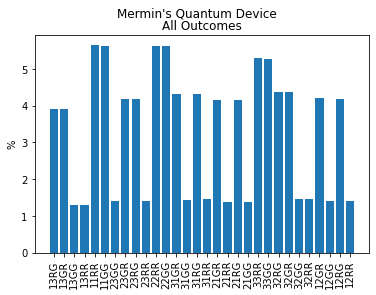

In [29]:
# Plot all results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('All Outcomes')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(results.values())
values = results.values()
pct_vals = [val*100/total for val in values]
plt.bar(results.keys(), pct_vals)

<BarContainer object of 2 artists>

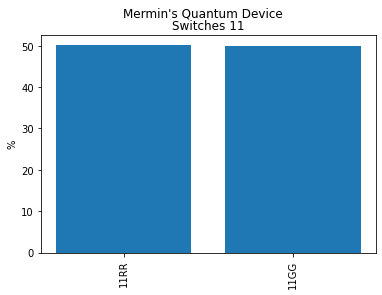

In [30]:
# Plot occurances switches '11' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 11')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(one_1_counts.values())
values = one_1_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(one_1_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

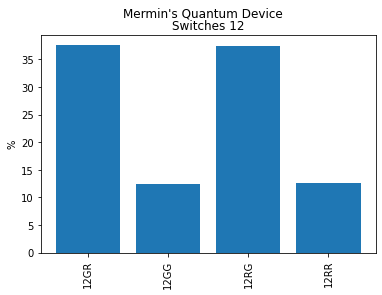

In [31]:
# Plot occurances switches '12' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 12')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(one_2_counts.values())
values = one_2_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(one_2_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

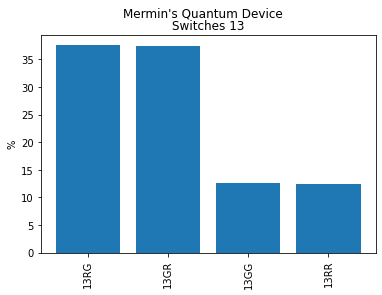

In [32]:
# Plot occurances switches '13' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 13')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(one_3_counts.values())
values = one_3_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(one_3_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

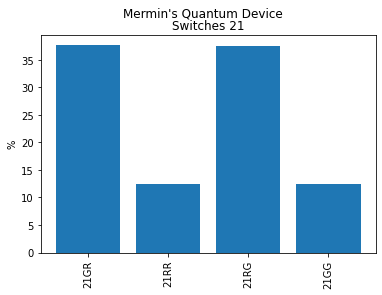

In [33]:
# Plot occurances switches '21' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 21')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(two_1_counts.values())
values = two_1_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(two_1_counts.keys(), pct_vals)

<BarContainer object of 2 artists>

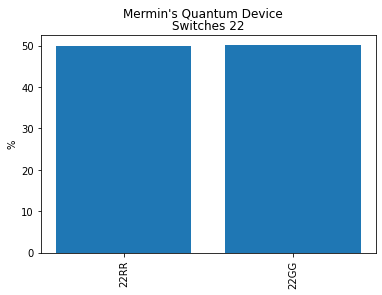

In [34]:
# Plot occurances switches '22' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 22')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(two_2_counts.values())
values = two_2_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(two_2_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

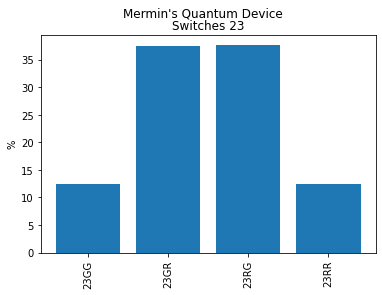

In [35]:
# Plot occurances switches '23' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 23')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(two_3_counts.values())
values = two_3_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(two_3_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

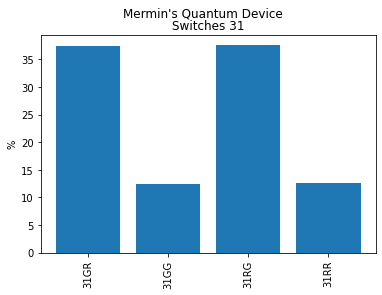

In [36]:
# Plot occurances switches '31' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 31')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(three_1_counts.values())
values = three_1_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(three_1_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

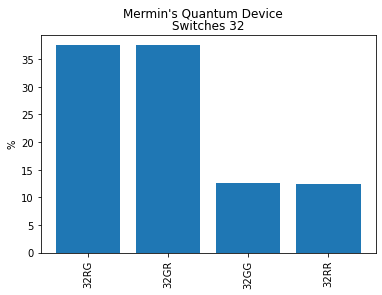

In [37]:
# Plot occurances switches '32' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 32')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(three_2_counts.values())
values = three_2_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(three_2_counts.keys(), pct_vals)

<BarContainer object of 2 artists>

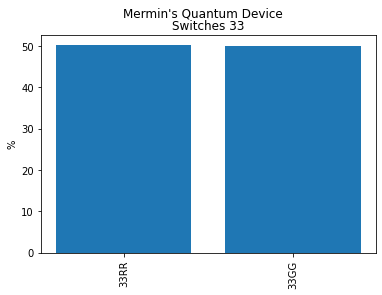

In [38]:
# Plot occurances switches '33' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 33')
plt.ylabel('%')
plt.xticks(rotation='vertical')
total = sum(three_3_counts.values())
values = three_3_counts.values()
pct_vals = [val*100/total for val in values]
plt.bar(three_3_counts.keys(), pct_vals)